In [13]:
# imports
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms

print("the torch version is {}".format(torch.__version__))

the torch version is 1.6.0


In [3]:
# import the image data
scratch_dir = "/home/javaprog/Data/Personal/Scratch/"
cifar10 = datasets.CIFAR10(scratch_dir, train=True, download=True)
cifar10_validation = datasets.CIFAR10(scratch_dir, train=False, download=True)

100%|█████████▉| 170008576/170498071 [00:22<00:00, 6735314.49it/s]Extracting /home/javaprog/Data/Personal/Scratch/cifar-10-python.tar.gz to /home/javaprog/Data/Personal/Scratch/
Files already downloaded and verified


In [4]:
# print the method resolution order of the dataset
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [5]:
# get the length of the dataset
len(cifar10)

50000

In [10]:
# get the class names
class_names = cifar10.classes

In [9]:
# print an image
index = 77
image, label = cifar10[index]
image, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5C582883C8>, 0, 'airplane')

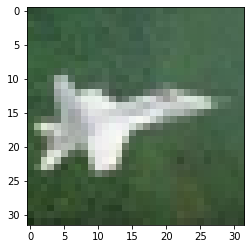

In [12]:
# print the images
plt.imshow(image)
plt.show()

In [14]:
# list the transforms
dir(transforms)


['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [16]:
# input the image into a tensor
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image)
print("the image tensor shpw is {}".format(image_tensor.shape))


the image tensor shpw is torch.Size([3, 32, 32])


In [19]:
# reload cifar10 into tensor format
cifar10_tensor = datasets.CIFAR10(scratch_dir, train=True, download=False, transform=transforms.ToTensor())
print("the dataset length is {}".format(len(cifar10_tensor)))


the dataset length is 50000


In [21]:
# get the image from the tensored dataset
image_tensored, label = cifar10_tensor[index]
print("the tensored image at index {} is of shape {} and type {} and datatype {}".format(index, image_tensored.shape, type(image_tensored), image_tensored.dtype))

the tensored image at index 77 is of shape torch.Size([3, 32, 32]) and type <class 'torch.Tensor'> and datatype torch.float32


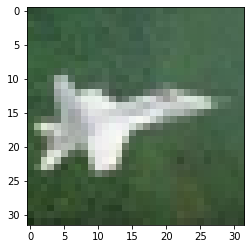

In [24]:
# print the new image
# NOTE: need to flip matrix from C/H/W to H/W/C
plt.imshow(image_tensored.permute(1, 2, 0))
plt.show()

In [28]:
# load all the images into a batch tensor
images_stacked = torch.stack([image_temp for image_temp, _ in cifar10_tensor], dim=3)
print("the stacked images are of type {} and shape {}".format(type(images_stacked), images_stacked.shape))

the stacked images are of type <class 'torch.Tensor'> and shape torch.Size([3, 32, 32, 50000])


In [29]:
# build a tensor to compute the mean and std
images_calc = images_stacked.view(3, -1)
print("the stacked mean/std images are of type {} and shape {}".format(type(images_calc), images_calc.shape))

the stacked mean/std images are of type <class 'torch.Tensor'> and shape torch.Size([3, 51200000])
